# Introduction of National Incident-Based Reporting System 

National Incident-Based Reporting System (NIBRS) is designed as a summary system to collect criminal incident and arrestee data using ***incident-based reporting***. Incident-based reporting can capture all offenses within an incident - up to ten crime occurrences. Up to now, 36 different states participate in the collecting uniform crime statistics through NIBRS on a yearly basis. The data structure of NIBRS data can be divided into three major parts: **offense**, **victim** and **arrestee**. Under each part, there are some detailed information are presented, such as offense type, category, location and etc.

In this project, I would like to start with analyzing the offense related data to understand the structure of the data system. Using the basic idea of descriptive, inferential and trend analysis to find some internal relationship between variables. 

# Analysis

## Part 1: Descriptive analysis

By merging all the available state level data (36 different states) in **2016** into a national level crime data set, I am able to provide some basic statistics to show the crime patterns and rate of all the offenses incidents on file.

Why not 2017? NIBRS is still collecting and cleaning the data files in 2017 when I am working on this project.

**My goal in this part is to answer three broad questions:**

1) What are the Top 10 offense types/categories/locations in the U.S.?

2) What are the criminal rates for all these 36 states? Can I rank it? 

3) What is the incident rate rate for the most frequently occured offense type/category/location? Can I rank it?

Before loading the main offense data file. I would like to clean the universial variables: ```Offense type```, ```offense category``` and ```offense location``` first. There are two major reasons to do so. First, First of all, I would like to give some quick introduction of these **universal variables**, which are used in the NIBRS system, and not change from year to year, state to state. Second, these variables will be link to the main ```offense``` data file later on.

Please let me start at the ```offense type``` data file. (As I mentioned before, these are universial variables. Therefore I only need to load them once. I would like to use Wisconsin offense type data file).

In [1]:
import pandas as pd                    # for data handling
import numpy as np                     # for numerical methods and data structures
import matplotlib.pyplot as plt        # for plotting
import seaborn as sea                  # advanced plotting
from pathlib import Path
import geopandas                       # geopandas for maps work
from shapely.geometry import Point     # shapely handles the coordinate references for plotting shapes
import statsmodels.formula.api as smf  # provides a way to directly spec models from formulas

pd.set_option('precision', 3)          # take 3 decimal points for all the float number

In [3]:
OFFENSE_TYPE = pd.read_csv('WI-2016/NIBRS_OFFENSE_TYPE.csv')
# There are some not that useful varables, to make the data set looks better. I will drop them.
OFFENSE_TYPE = OFFENSE_TYPE.drop(labels = ['ct_flag','hc_flag','hc_code'],axis = 1)
print(OFFENSE_TYPE.shape)
OFFENSE_TYPE.head()

(64, 5)


,offense_type_id,offense_code,offense_name,crime_against,offense_category_name
0,58,23*,Not Specified,Property,Larceny/Theft Offenses
1,1,09C,Justifiable Homicide,Not a Crime,Homicide Offenses
2,2,26A,False Pretenses/Swindle/Confidence Game,Property,Fraud Offenses
3,3,36B,Statutory Rape,Person,Sex Offenses
4,4,11C,Sexual Assault With An Object,Person,Sex Offenses


Let me show you a little bit more about the ```OFFENSE_TYPE``` data file.

### offense type
Each offense name will have a unique corresponding ```offense_type_id``` and ```offense_code```.

In [18]:
offense_name = OFFENSE_TYPE['offense_name'].unique()
print('There are ' + str(len(offense_name)) +' different types of offense name. \n')
print('There are '+ str(offense_name))

There are 64 different types of offense name. 

There are ['Not Specified' 'Justifiable Homicide'
 'False Pretenses/Swindle/Confidence Game' 'Statutory Rape'
 'Sexual Assault With An Object'
 'Destruction/Damage/Vandalism of Property' 'Family Offenses, Nonviolent'
 'Theft of Motor Vehicle Parts or Accessories'
 'Pornography/Obscene Material' 'Sports Tampering'
 'Driving Under the Influence' 'Counterfeiting/Forgery' 'Welfare Fraud'
 'Pocket-picking' 'Theft From Motor Vehicle'
 'Assisting or Promoting Prostitution' 'Drug/Narcotic Violations'
 'Wire Fraud' 'Purse-snatching' 'Runaway' 'Arson' 'Motor Vehicle Theft'
 'Drunkenness' 'Shoplifting' 'Operating/Promoting/Assisting Gambling'
 'Bad Checks' 'Extortion/Blackmail' 'Aggravated Assault'
 'Stolen Property Offenses' 'Kidnapping/Abduction' 'Prostitution'
 'Betting/Wagering' 'Murder and Nonnegligent Manslaughter' 'Peeping Tom'
 'Trespass of Real Property' 'Drug Equipment Violations' 'Rape'
 'Embezzlement' 'Negligent Manslaughter' 'Weapon Law

### offense category

These 64 different types of offenses are categorized into different offense category.

In [19]:
offense_category_name = OFFENSE_TYPE['offense_category_name'].unique()
print('There are ' + str(len(offense_category_name)) +' different types of offense category. \n')
print('There are '+ str(offense_category_name))

There are 24 different types of offense category. 

There are ['Larceny/Theft Offenses' 'Homicide Offenses' 'Fraud Offenses'
 'Sex Offenses' 'Destruction/Damage/Vandalism of Property' nan
 'Pornography/Obscene Material' 'Gambling Offenses'
 'Counterfeiting/Forgery' 'Prostitution Offenses' 'Drug/Narcotic Offenses'
 'Arson' 'Motor Vehicle Theft' 'Extortion/Blackmail' 'Assault Offenses'
 'Stolen Property Offenses' 'Kidnapping/Abduction' 'Embezzlement'
 'Weapon Law Violations' 'Robbery' 'Burglary/Breaking & Entering'
 'Bribery' 'Human Trafficking' 'Animal Cruelty']


### offense location

Now I am going to load a new data file realted to the location coding rules. 

In [21]:
LOCATION_TYPE = pd.read_csv('WI-2016/nibrs_location_type.csv')
LOCATION_TYPE.head()

,location_id,location_code,location_name
0,1,1,Air/Bus/Train Terminal
1,2,2,Bank/Savings and Loan
2,3,3,Bar/Nightclub
3,4,4,Church Synagogue/Temple
4,5,5,Commercial/Office Building


In [23]:
location_name = LOCATION_TYPE['location_name'].unique()
print('There are ' + str(len(location_name)) +' different types of locations.\n')
print('There are '+ str(location_name))

There are 47 different types of locations.

There are ['Air/Bus/Train Terminal' 'Bank/Savings and Loan' 'Bar/Nightclub'
 'Church Synagogue/Temple' 'Commercial/Office Building'
 'Construction Site' 'Convenience Store' 'Department/Discount Store'
 'Field/Woods' 'Government/Public Building' 'Grocery/Supermarket'
 'Highway/Road/Ally' 'Hotel/Motel/Etc.' 'Jail/Prison' 'Lake/Waterway'
 'Liquor Store' 'Parking Lot/Garage' 'Rental Stor. Facil.'
 'Residence/Home' 'Restaurant' 'School/College' 'Service/Gas Station'
 'Specialty Store' 'Other/Unknown' 'Abandoned/Condemned Structure'
 'Amusement Park' 'Arena/Stadium/Fairgrounds/Coliseum'
 'ATM Separate from Bank' 'Auto Dealership New/Used' 'Camp/Campground'
 'Daycare Facility' 'Dock/Wharf/Freight/Modal Terminal' 'Farm Facility'
 'Gambling Facility/Casino/Race Track' 'Industrial Site'
 'Military Installation' 'Park/Playground' 'Rest Area'
 'School-College/University' 'School-Elementary/Secondary'
 'Shelter-Mission/Homeless' 'Shopping Mall' 'Tribal La

Up to now, all the preparation works are done. 

The next step is starting working on the main ```OFFENSE``` file. There are 36 state-level avaliable files in 2016. To make the data loading and cleaning process more efficient, I am going to use the for loop to simplyfy the whole process. 

1. Get the U.S states list.

In [24]:
state_codes = pd.read_csv('state_codes.csv')
state_codes = state_codes.drop(labels = 'fips',axis = 1)
state_list = state_codes['postal']
print(state_list.head(3))

0    AL
1    AK
2    AZ
Name: postal, dtype: object


2 Create 3 data frame ```offense_location```, ```offense_category```,```offense_type``` for future use.

In [25]:
offense_location = pd.DataFrame()
offense_category = pd.DataFrame()
offense_type = pd.DataFrame()

3 Finally the for loop!

In [26]:
for state in state_list:
    path_name = state + '-2016/NIBRS_OFFENSE.csv'
    my_file = Path(path_name)
    if my_file.is_file():
        file_name =  state + '_OFFENSE'
        file_name = pd.read_csv(path_name)
        #drop useless varable
        file_name = file_name.drop(labels = ['num_premises_entered','ff_line_number'],axis = 1)
        #merge with offense type
        merge_file_name = state +'_OFFENSE_MERGE'
        merge_file_name = pd.merge(left = file_name, right = OFFENSE_TYPE, on = 'offense_type_id', how = 'left')
        #merge with location type
        merge_file_name = pd.merge(left = merge_file_name, right = LOCATION_TYPE, on = 'location_id', how = 'left')
        # count offense type
        type_count_list = merge_file_name['offense_name'].value_counts()
        # create a state level data frame to contain offense type, state code
        state_type_df = pd.DataFrame()
        state_type_df['offense_type_count'] = type_count_list
        state_type_df['state'] = state
        state_type_df = state_type_df.reset_index()
        state_type_df.rename(columns = {'index':'offense_type'},inplace = True)
        # append the newly created type data frame to the offense_type
        offense_type = offense_type.append(state_type_df)
        
        # count offense category
        category_count_list = merge_file_name['offense_category_name'].value_counts()
        # create a state level data frame to contain offense type, state code
        state_category_df = pd.DataFrame()
        state_category_df['offense_category_count'] = category_count_list
        state_category_df['state'] = state
        state_category_df = state_category_df.reset_index()
        state_category_df.rename(columns = {'index':'offense_category'},inplace = True)
        # append the newly created type data frame to the offense_type
        offense_category = offense_category.append(state_category_df)
        
         # count offense location
        location_count_list = merge_file_name['location_name'].value_counts()
        # create a state level data frame to contain offense type, state code
        state_location_df = pd.DataFrame()
        state_location_df['offense_location_count'] = location_count_list
        state_location_df['state'] = state
        state_location_df = state_location_df.reset_index()
        state_location_df.rename(columns = {'index':'offense_location'},inplace = True)
        # append the newly created type data frame to the offense_type
        offense_location= offense_location.append(state_location_df)

Good News! After the long loop. I have already created three data frame ```offense_type```, ```offense_category```,```offense_location``` that can be applied to answer my questions posted at the beginning. These three data frames contain the each offense count for all the 36 states. I would like to show you what it looks like by printing out ```offense_type``` as an example 

In [29]:
offense_type.head()

,offense_type,offense_type_count,state
0,Simple Assault,526,AL
1,Theft From Motor Vehicle,393,AL
2,Drug/Narcotic Violations,357,AL
3,Destruction/Damage/Vandalism of Property,238,AL
4,Intimidation,224,AL


1) count and rank the **offense type**

To do so, let me count the top 10 offense type at the national level.

In [31]:
offense_type_grouped = offense_type.groupby('offense_type')
type_sum_country_level = offense_type_grouped.sum()
# Top 5 offense type at the country level
print(type_sum_country_level['offense_type_count'].sort_values(ascending=False).head())

offense_type
Destruction/Damage/Vandalism of Property    751423
Simple Assault                              689100
All Other Larceny                           659527
Drug/Narcotic Violations                    538841
Burglary/Breaking & Entering                456814
Name: offense_type_count, dtype: int64


Sometimes numbers are really hard to interpret, especially when they are all fairly large. So I will change them to **percentage**, which might be more intuitive to read. 

I will caculate the percentage by:
$$ (# of certain type offense / total # of offenses)*100 $$

In [34]:
total_type_sum = type_sum_country_level['offense_type_count'].sum()
type_sum_country_level['percentage'] = (type_sum_country_level['offense_type_count']/total_type_sum)*100
type_sum_country_level
top10_type = type_sum_country_level['percentage'].sort_values(ascending=False).head(10)
print('The total number of all types of offense is ' + str(total_type_sum) + '.')
top10_type

The total number of all types of offense is 5915346.


offense_type
Destruction/Damage/Vandalism of Property    12.703
Simple Assault                              11.649
All Other Larceny                           11.149
Drug/Narcotic Violations                     9.109
Burglary/Breaking & Entering                 7.723
Theft From Motor Vehicle                     7.097
Shoplifting                                  6.499
Drug Equipment Violations                    4.120
Motor Vehicle Theft                          3.712
Intimidation                                 3.656
Name: percentage, dtype: float64

In 2016, about 12.7% offenses are Destruction/Damage/Vandalism of Property, rank No.1. 

About 11.6% offenses are simple assault. "All other larceny" ranks the third. Here "all other" means all the other larceny types that are not specially defined. For example, the 5th common offense - Burglary/Breaking & Entering - is a specific type of larceny. 

Let me visualize the top 10 offense types using a bar graph.

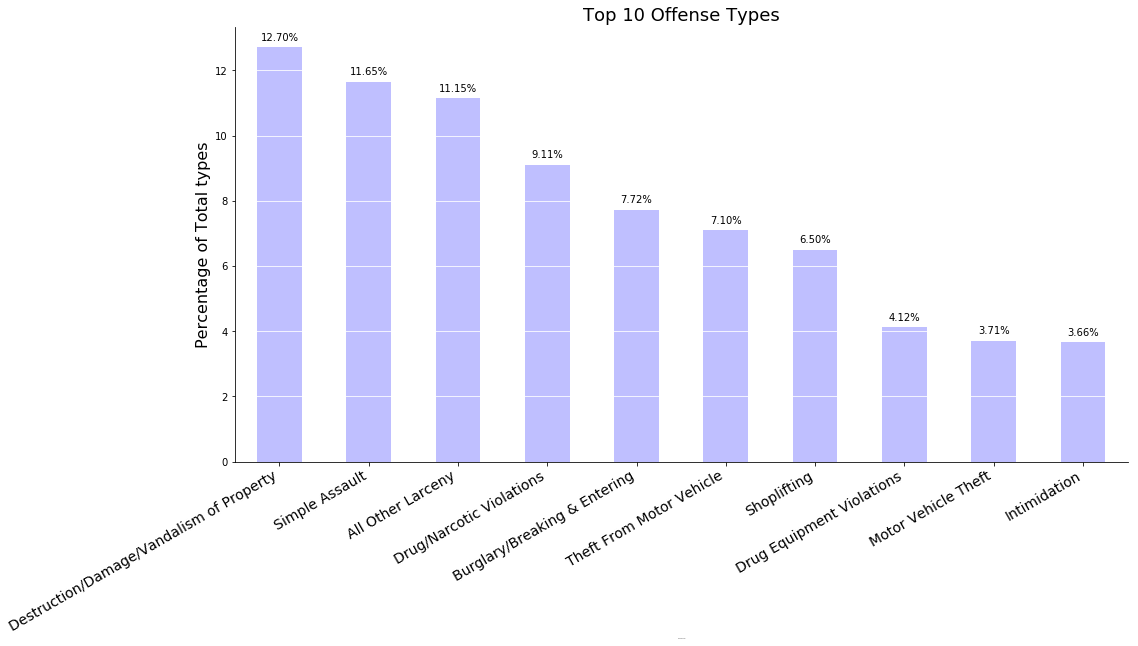

In [72]:
fig, ax = plt.subplots(figsize=(16,8))

top10_type.plot.bar(color='blue', alpha=0.25)      # bar(x labels, )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='white') # grid line

ax.set_xlabel('Offense Types',fontsize = 0)
ax.set_ylabel('Percentage of Total types',fontsize = 16)
ax.set_title('Top 10 Offense Types',fontsize = 18)
# Set_label font
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels (labels,fontsize = 14,rotation = 30, ha='right')

rects = ax.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # Use Y value as label and format number with one decimal place
    label = "{:.2f}%".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.


plt.show()

2) count and rank the **offense category**

In [68]:
offense_category_grouped = offense_category.groupby('offense_category')
category_sum_country_level = offense_category_grouped.sum()
# Top 5 offense category at the country level
print(category_sum_country_level['offense_category_count'].sort_values(ascending=False).head())

offense_category
Larceny/Theft Offenses                      1768360
Assault Offenses                            1095550
Drug/Narcotic Offenses                       782571
Destruction/Damage/Vandalism of Property     751423
Burglary/Breaking & Entering                 456814
Name: offense_category_count, dtype: int64


In [70]:
total_category_sum = category_sum_country_level['offense_category_count'].sum()
category_sum_country_level['percentage'] = (category_sum_country_level['offense_category_count']/total_category_sum)*100
category_sum_country_level
top10_category = category_sum_country_level['percentage'].sort_values(ascending=False).head(10)
print('The total number of all categories of offense is ' + str(total_category_sum) + '.')
top10_category

The total number of all categories of offense is 5915346.


offense_category
Larceny/Theft Offenses                      29.894
Assault Offenses                            18.520
Drug/Narcotic Offenses                      13.230
Destruction/Damage/Vandalism of Property    12.703
Burglary/Breaking & Entering                 7.723
Fraud Offenses                               6.273
Motor Vehicle Theft                          3.712
Weapon Law Violations                        1.617
Counterfeiting/Forgery                       1.518
Sex Offenses                                 1.429
Name: percentage, dtype: float64

In 2016, about 29.9% offenses are larceny/theft offenses, ranking No.1.
About 18.5% offenses are assault offenses. Drug/Narcotic offenses ranks the third. These make sense because the most common offenses are always the "not that severe" offenses. An interesting thing needs to be mentioned here is the previous No.1 offense type is Destruction/Damage/Vandalism of Property. In the category ranking, it ranks the 4th and has the same percentage share. It seems like NIBRS makes itself to be a category, and a really common category. 

Let me visualize the top 10 offense category using a bar graph as well.

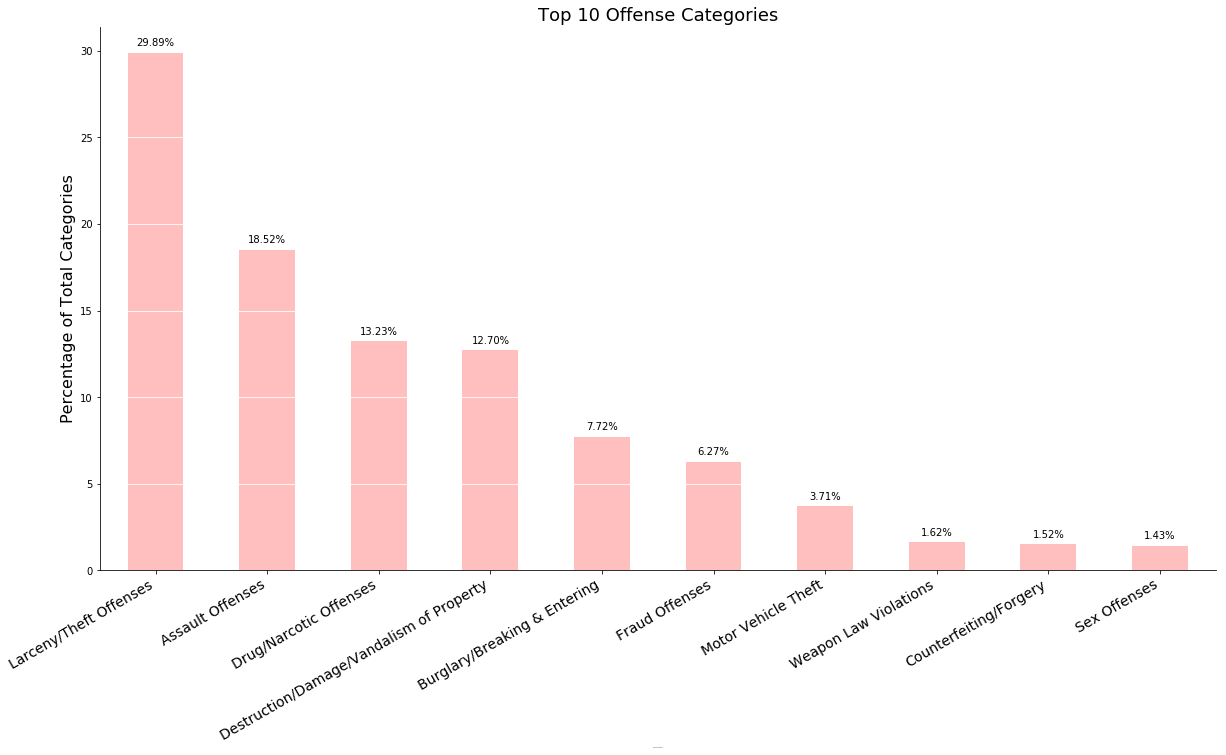

In [74]:
fig, ax = plt.subplots(figsize=(20,10))

top10_category.plot.bar(color='red', alpha=0.25)      # bar(x labels, )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='white') # grid line

ax.set_xlabel('Offense Categories',fontsize = 0)
ax.set_ylabel('Percentage of Total Categories',fontsize = 16)
ax.set_title('Top 10 Offense Categories',fontsize = 18)
# Set_label font
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels (labels,fontsize = 14,rotation = 30, ha='right')

rects = ax.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # Use Y value as label and format number with one decimal place
    label = "{:.2f}%".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.


plt.show()

3) count and rank the **offense location**

In [75]:
offense_location_grouped = offense_location.groupby('offense_location')
location_sum_country_level = offense_location_grouped.sum()
# Top 5 offense category at the country level
print(location_sum_country_level['offense_location_count'].sort_values(ascending=False).head())

offense_location
Residence/Home               2500311
Highway/Road/Ally             935596
Parking Lot/Garage            477672
Other/Unknown                 335521
Department/Discount Store     324640
Name: offense_location_count, dtype: int64


In [77]:
total_location_sum = location_sum_country_level['offense_location_count'].sum()
location_sum_country_level['percentage'] = (location_sum_country_level['offense_location_count']/total_location_sum)*100
top10_location = location_sum_country_level['percentage'].sort_values(ascending=False).head(10)
print('The total number of all categories of offense is ' + str(total_location_sum) + '.')
top10_location

The total number of all categories of offense is 5915346.


offense_location
Residence/Home                42.268
Highway/Road/Ally             15.816
Parking Lot/Garage             8.075
Other/Unknown                  5.672
Department/Discount Store      5.488
Grocery/Supermarket            2.129
Convenience Store              2.046
Specialty Store                1.848
Commercial/Office Building     1.765
Restaurant                     1.559
Name: percentage, dtype: float64

In 2016, about 42.3% offenses happened in residence or home. It is about three times more than the 2nd place - Highway/Road/Ally. Why did residence/home become such popular choices for offenders? Look back to see the top 2 offense category, larceny and assualt offense has really high frequency. My thought is this two are more likely to happen in the home setting because these type of offenses need high level of privacy. I may conduct inferential analysis to find the internal relationship between location preference and crime activity. 

Let me visualize the top 10 offense location using a bar graph again.

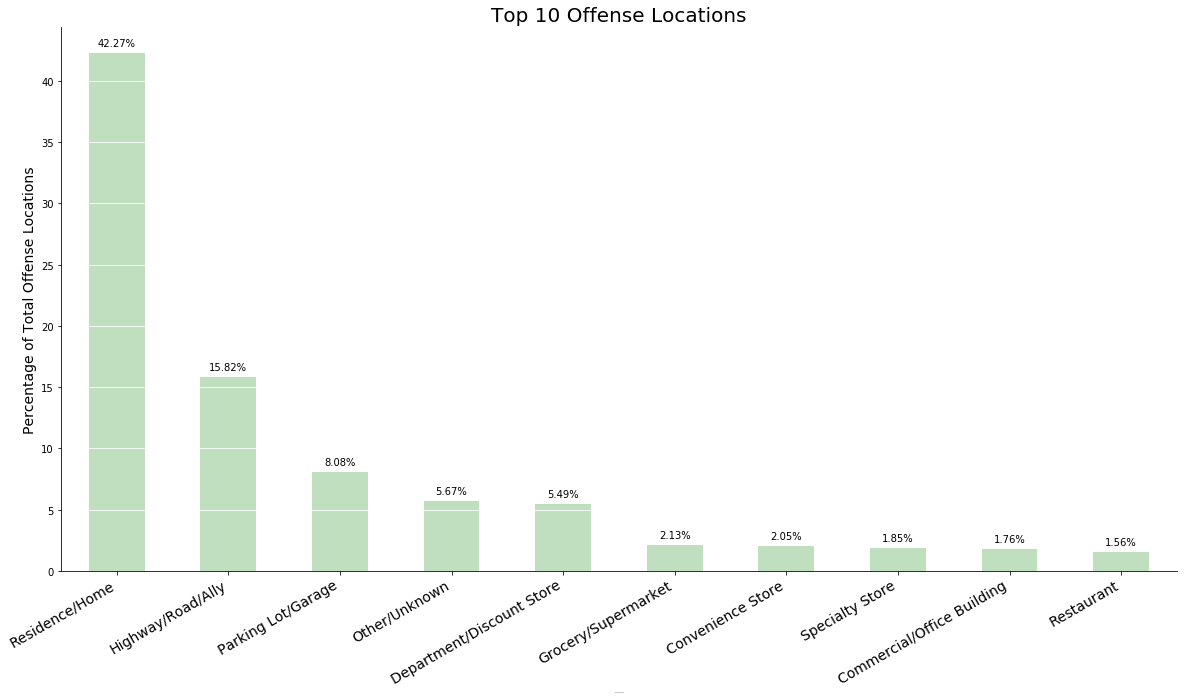

In [79]:
fig, ax = plt.subplots(figsize=(20,10))

top10_location.plot.bar(color='Green', alpha=0.25)      # bar(x labels, )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='white') # grid line

ax.set_xlabel('Offense Location',fontsize = 0)
ax.set_ylabel('Percentage of Total Offense Locations',fontsize = 14)
ax.set_title('Top 10 Offense Locations',fontsize = 20)
# Set_label font
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels (labels,fontsize = 14,rotation = 30, ha='right')

rects = ax.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # Use Y value as label and format number with one decimal place
    label = "{:.2f}%".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.


plt.show()

Up to now, I have discussed the overall level of the offense type, category and location. How about the state-level?

1) Which state had the highest crime rate in 2016?

2) Which state was more likely to experience the offense type such as Destruction/Damage/Vandalism of Property (Top1)?

3) Which state was more likely to occur Larceny/Theft Offenses?

4) Which state's residents' houses are the most dangerous?

To answer these three questions, I would like to reorganized the data set a little bit, and use map to visualize the results.

I would also like to introduce in a new data file, ```state level population```.  The population data was collected and predicted by the U.S Census. The reason why I mentioned the popluation here is that each state has different population level. It is reasonable to assume in the crowded states, the number of crime events are on average higher than the others. Therefore it is unfair to just use incident level to measure how safe a state is. Therefore, I would like to mannually calculate the crime rate to make the comparison: 

$$ crime rate =  (# of incident / population) *100 $$

### 1 Which state had the highest crime rate in 2016?
To answer this, first, I have to load the population data, and clean it up. 

In [82]:
pop = pd.read_csv('nst-est2017-alldata.csv')
pop = pop[['NAME','POPESTIMATE2016']]
pop = pop.iloc[5:56,:]
pop.rename(columns = {'NAME':'state'},inplace = True)
pop.head()

,state,POPESTIMATE2016
5,Alabama,4.861e+06
6,Alaska,7.415e+05
7,Arizona,6.909e+06
8,Arkansas,2.988e+06
9,California,3.930e+07


Merge with the ```state_codes```.

In [84]:
state_codes = pd.read_csv('state_codes.csv')
state_codes = state_codes.drop(labels = 'fips',axis = 1)
population = pd.merge(left = state_codes, right = pop, on = 'state', how = 'right')
population.head()

,state,postal,POPESTIMATE2016
0,Alabama,AL,4.861e+06
1,Alaska,AK,7.415e+05
2,Arizona,AZ,6.909e+06
3,Arkansas,AR,2.988e+06
4,California,CA,3.930e+07


With the 2016 population, the crime rate can be calculated. To do so, firstly create a new data frame ```offense_incident```. Then create column ```total_incident``` to hold the number of incident of each state. Calcluate the crime rate using the formula above. Then merge it with the population data set. 
Finally, create a new column ```crime_rate```. 

(Surprising, I just noticed that this data set does not have some really big states, such as California, New York)

In [86]:
#create a new data frame offense_incident use to calcluate the crime rate
offense_incident = state_codes
offense_incident['total_incident'] = float('nan')


for state in state_list:
    path_name = state + '-2016/NIBRS_OFFENSE.csv'
    my_file = Path(path_name)
    if my_file.is_file():
        file_name =  state + '_OFFENSE'
        file_name = pd.read_csv(path_name)
        #drop useless varable
        file_name = file_name.drop(labels = ['num_premises_entered','ff_line_number'],axis = 1)
    
        #count offense incident number 
        incident_count_list = file_name['incident_id'].value_counts()
        # create a state level data frame to contain total number of incident of each state, state code
        offense_incident.loc[offense_incident['postal']== state,'total_incident'] = len(incident_count_list)
        
        

crime_rate = pd.merge(left = population , right = offense_incident, on = 'postal', how = 'left' )

#From now on, offense tpye count represent the state level incidents count, because the groupby method in the first line
crime_rate['crime_rate'] = (crime_rate['total_incident']/crime_rate['POPESTIMATE2016'])*100

crime_rate.head()

,state_x,postal,POPESTIMATE2016,state_y,total_incident,crime_rate
0,Alabama,AL,4.861e+06,Alabama,3057.0,0.063
1,Alaska,AK,7.415e+05,Alaska,NaN,NaN
2,Arizona,AZ,6.909e+06,Arizona,16847.0,0.244
3,Arkansas,AR,2.988e+06,Arkansas,200224.0,6.700
4,California,CA,3.930e+07,California,NaN,NaN


Now it's time to draw the map. First, let me load the map file, which is downloaded from US Census Bureau. https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html

In [89]:
states_map = geopandas.read_file('cb_2016_us_state_5m/cb_2016_us_state_5m.shp')
states_map = states_map.drop(labels = ['STATEFP','STATENS','AFFGEOID','GEOID'],axis = 1)
states_map.rename(columns = {'STUSPS':'postal'},inplace = True)
# merge it with crime_rate, and drop the some states
state_map_merge = pd.merge(left = states_map, right = crime_rate, on = 'postal', how = 'left')
states_drop = ['Puerto Rico','American Samoa','Commonwealth of the Northern Mariana Islands'
               ,'United States Virgin Islands','Guam','Hawaii','Alaska','District of Columbia']
for state_drop in states_drop:
    state_map_merge = state_map_merge[state_map_merge['NAME']!=state_drop]
state_map_merge.head()

# Get the capital location pair
capitals = pd.read_csv('capitals.csv')
capitals['cap_cord'] = list(zip(capitals.longitude, capitals.latitude))
capitals['cap_cord'] = capitals['cap_cord'].apply(Point)
capitals = pd.merge(left = state_codes, right = capitals, on = 'state', how = 'right')
state_map_merge = pd.merge(left = state_map_merge, right = capitals, on = 'postal', how = 'left')
state_map_merge.head()

,postal,NAME,LSAD,ALAND,AWATER,geometry,state_x,POPESTIMATE2016,state_y,total_incident_x,crime_rate,state,total_incident_y,capital,latitude,longitude,cap_cord
0,AL,Alabama,00,131173688951,4593686489,"(POLYGON ((-88.04374299999999 30.517423, -88.0...",Alabama,4.861e+06,Alabama,3057.0,0.063,Alabama,3057.0,Montgomery,32.362,-86.279,POINT (-86.27911800000001 32.361538)
1,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.799683 32.593621, -114.809393 3...",Arizona,6.909e+06,Arizona,16847.0,0.244,Arizona,16847.0,Phoenix,33.448,-112.074,POINT (-112.073844 33.448457)
2,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.060253 38.599328, -109.059541 3...",Colorado,5.530e+06,Colorado,278441.0,5.035,Colorado,278441.0,Denver,39.739,-104.984,POINT (-104.984167 39.7391667)
3,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777499999999 41.100696, -73.69...",Connecticut,3.588e+06,Connecticut,97560.0,2.719,Connecticut,97560.0,Hartford,41.767,-72.677,POINT (-72.67699999999999 41.767)
4,FL,Florida,00,138924199212,31386038155,"(POLYGON ((-80.751643 24.857254, -80.729063 24...",Florida,2.066e+07,Florida,NaN,NaN,Florida,NaN,Tallahassee,30.452,-84.273,POINT (-84.27276999999999 30.4518)


Draw the map!

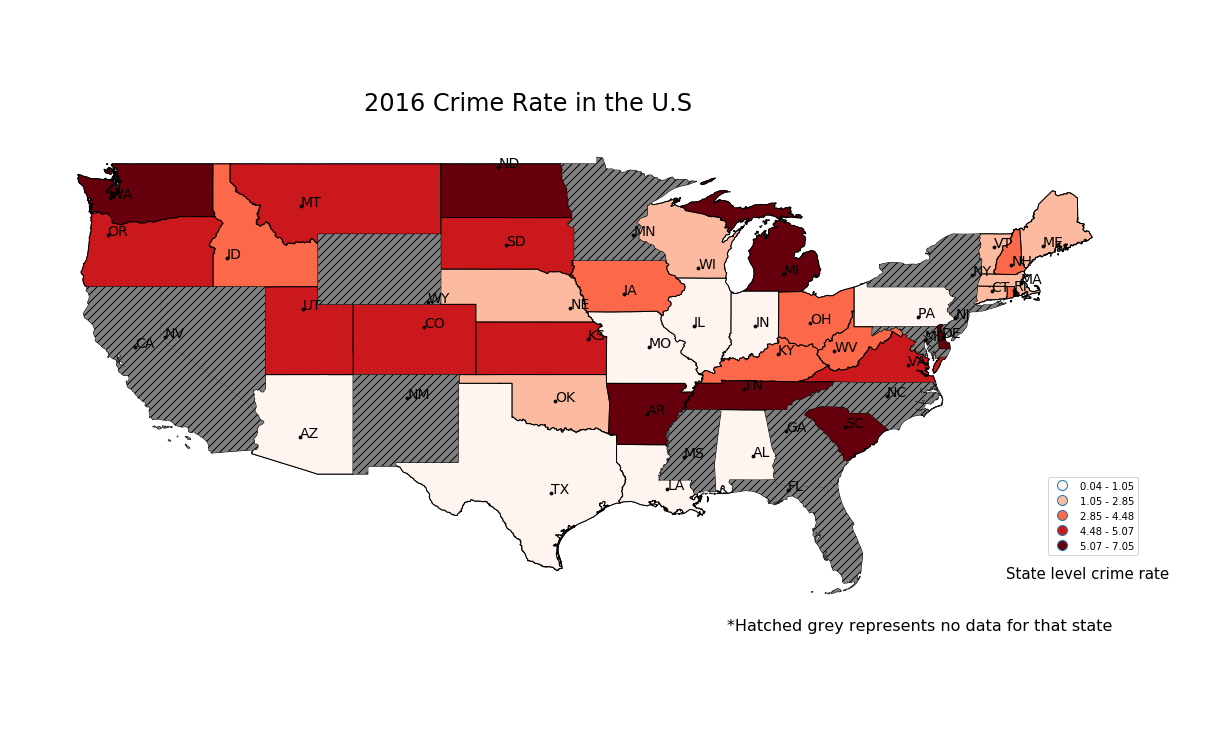

In [168]:
fig,gax = plt.subplots(figsize = (20,14))

state_map_merge.plot(ax=gax,edgecolor = 'black',color = 'white')
# Draw the state with vaild data
ax = state_map_merge[state_map_merge['crime_rate']>=0].plot(ax=gax,edgecolor = 'black',scheme='quantiles', column = 'crime_rate', legend = True, cmap = 'Reds')
state_map_merge[~(state_map_merge['crime_rate']>=0)].plot(ax=gax, hatch='///', color='grey')
gax.annotate('State level crime rate',xy = (0.83,0.22),xycoords = 'figure fraction',fontsize = 15)
ax.get_legend().set_bbox_to_anchor((1, 0.3))


gdf = geopandas.GeoDataFrame(state_map_merge, geometry='cap_cord')
gdf.plot(ax=gax, color='black',markersize = 8)
for x, y, label in zip(gdf['cap_cord'].x, gdf['cap_cord'].y, gdf['postal']):
    gax.text(x, y, label, fontsize = 14)

gax.annotate('2016 Crime Rate in the U.S',xy = (0.3,0.85),xycoords = 'figure fraction',fontsize = 24)
gax.annotate('*Hatched grey represents no data for that state',xy = (0.6,0.15),xycoords = 'figure fraction',fontsize = 16)
    
plt.axis('off')

plt.show()

Another type of visualization, instead of using quantiles as scheme.

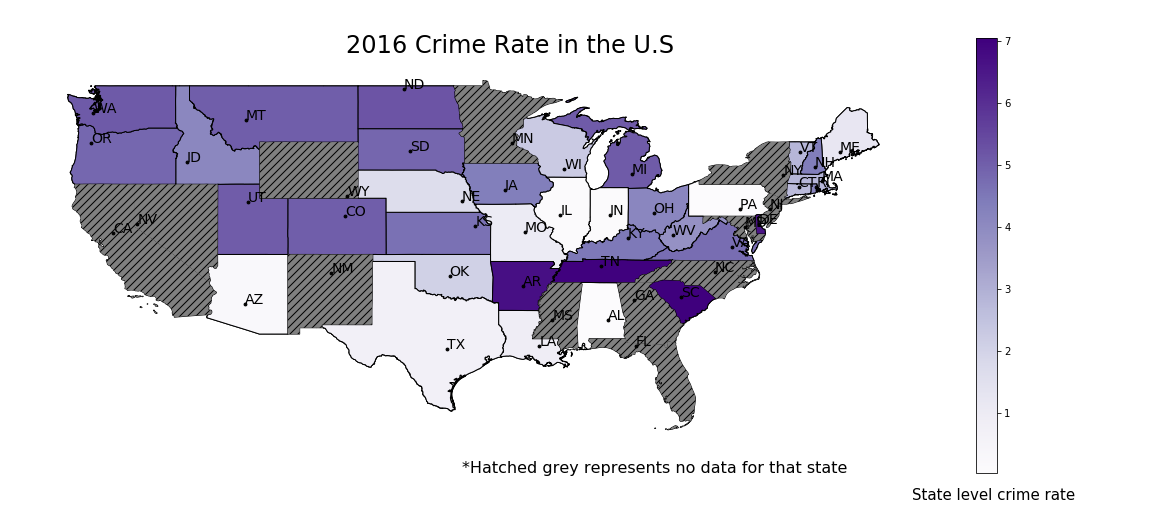

In [194]:
fig,gax = plt.subplots(figsize = (20,8))

state_map_merge.plot(ax=gax,edgecolor = 'black',color = 'white')
# Draw the state with vaild data
ax = state_map_merge[state_map_merge['crime_rate']>=0].plot(ax=gax,edgecolor = 'black', column = 'crime_rate', legend = True, cmap = 'Purples')
state_map_merge[~(state_map_merge['crime_rate']>=0)].plot(ax=gax, hatch='///', color='grey')
gax.annotate('State level crime rate',xy = (0.79,0.05),xycoords = 'figure fraction',fontsize = 15)



gdf = geopandas.GeoDataFrame(state_map_merge, geometry='cap_cord')
gdf.plot(ax=gax, color='black',markersize = 8)
for x, y, label in zip(gdf['cap_cord'].x, gdf['cap_cord'].y, gdf['postal']):
    gax.text(x, y, label, fontsize = 14)

gax.annotate('2016 Crime Rate in the U.S',xy = (0.3,0.9),xycoords = 'figure fraction',fontsize = 24)
gax.annotate('*Hatched grey represents no data for that state',xy = (0.4,0.1),xycoords = 'figure fraction',fontsize = 16)
    
plt.axis('off')

plt.show()

From the graph, I find **SC, TN, and AR** have the highest Larceny/Theft Offenses incident rates in 2016. How high it is?

And I am personally curious in Texas.

In [172]:
SC_crime_rate = float(state_map_merge.loc[state_map_merge['postal']=='SC','crime_rate'].values)
TN_crime_rate = float(state_map_merge.loc[state_map_merge['postal']=='TN','crime_rate'].values)
AR_crime_rate = float(state_map_merge.loc[state_map_merge['postal']=='AR','crime_rate'].values)
TX_crime_rate = float(state_map_merge.loc[state_map_merge['postal']=='TX','crime_rate'].values)
print('The crime rate in South Carolina is {0:.1f}%.'.format(SC_crime_rate))
print('The crime rate in Tennessee is {0:.1f}%.'.format(TN_crime_rate))
print('The crime rate in Arkansas is {0:.1f}%.'.format(AR_crime_rate))
print('The crime rate in Texas is {0:.1f}%.'.format(TX_crime_rate))

The crime rate in South Carolina is 7.0%.
The crime rate in Tennessee is 7.0%.
The crime rate in Arkansas is 6.7%.
The crime rate in Texas is 0.7%.


### 2 Which state was more likely to experience the offense type such as Destruction/Damage/Vandalism of Property (Top1)?

In the previous section, I have showed the top 10 criminal types, using both tables and bar graph. In this section, I would like to answer the question listed in the title by rank the most common type of offense -Destruction/Damage/Vandalism of Property - at a state level.It may not make sense to still use "crime rate" for such specific type of offenses. My basic thought is to evaluate the **incident rate**. The incident rate is defined as the ratio of a specific type of offense among the total incident. 

$$ incident rate =  ( incident # of a specific type of offense / total # of incident) *100 $$

To answer this specific question, I would like to crete a new data fram ```top_1_type``` to store all the related data and use for future map drawing

In [178]:
top_1_type = offense_type[offense_type['offense_type'] == 'Destruction/Damage/Vandalism of Property']
top_1_type.rename(columns = {'state':'postal','offense_type_count':'top_1_count'},inplace = True)
top_1_type = pd.merge(left = offense_incident, right = top_1_type, on = 'postal', how = 'outer'  )
top_1_type['incident_rate'] = (top_1_type['top_1_count']/top_1_type['total_incident'] )*100
top_1_type.head(5)

,state,postal,total_incident,offense_type,top_1_count,incident_rate
0,Alabama,AL,3057.0,Destruction/Damage/Vandalism of Property,238.0,7.785
1,Alaska,AK,NaN,NaN,NaN,NaN
2,Arizona,AZ,16847.0,Destruction/Damage/Vandalism of Property,3830.0,22.734
3,Arkansas,AR,200224.0,Destruction/Damage/Vandalism of Property,27754.0,13.861
4,California,CA,NaN,NaN,NaN,NaN


In [179]:
states_map_2 = geopandas.read_file('cb_2016_us_state_5m/cb_2016_us_state_5m.shp')
states_map_2 = states_map_2.drop(labels = ['STATEFP','STATENS','AFFGEOID','GEOID'],axis = 1)
states_map_2.rename(columns = {'STUSPS':'postal'},inplace = True)
# merge it with crime_rate, and drop the some states
state_map_merge_2 = pd.merge(left = states_map_2, right = top_1_type, on = 'postal', how = 'left')
states_drop = ['Puerto Rico','American Samoa','Commonwealth of the Northern Mariana Islands'
               ,'United States Virgin Islands','Guam','Hawaii','Alaska','District of Columbia']
for state_drop in states_drop:
    state_map_merge_2 = state_map_merge_2[state_map_merge_2['NAME']!=state_drop]
state_map_merge.head()
# Get the capital location pair
capitals = pd.read_csv('capitals.csv')
capitals['cap_cord'] = list(zip(capitals.longitude, capitals.latitude))
capitals['cap_cord'] = capitals['cap_cord'].apply(Point)
capitals = pd.merge(left = state_codes, right = capitals, on = 'state', how = 'right')
state_map_merge_2 = pd.merge(left = state_map_merge_2, right = capitals, on = 'postal', how = 'left')
state_map_merge_2.head()

,postal,NAME,LSAD,ALAND,AWATER,geometry,state_x,total_incident_x,offense_type,top_1_count,incident_rate,state_y,total_incident_y,capital,latitude,longitude,cap_cord
0,AL,Alabama,00,131173688951,4593686489,"(POLYGON ((-88.04374299999999 30.517423, -88.0...",Alabama,3057.0,Destruction/Damage/Vandalism of Property,238.0,7.785,Alabama,3057.0,Montgomery,32.362,-86.279,POINT (-86.27911800000001 32.361538)
1,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.799683 32.593621, -114.809393 3...",Arizona,16847.0,Destruction/Damage/Vandalism of Property,3830.0,22.734,Arizona,16847.0,Phoenix,33.448,-112.074,POINT (-112.073844 33.448457)
2,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.060253 38.599328, -109.059541 3...",Colorado,278441.0,Destruction/Damage/Vandalism of Property,46099.0,16.556,Colorado,278441.0,Denver,39.739,-104.984,POINT (-104.984167 39.7391667)
3,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777499999999 41.100696, -73.69...",Connecticut,97560.0,Destruction/Damage/Vandalism of Property,15709.0,16.102,Connecticut,97560.0,Hartford,41.767,-72.677,POINT (-72.67699999999999 41.767)
4,FL,Florida,00,138924199212,31386038155,"(POLYGON ((-80.751643 24.857254, -80.729063 24...",Florida,NaN,NaN,NaN,NaN,Florida,NaN,Tallahassee,30.452,-84.273,POINT (-84.27276999999999 30.4518)


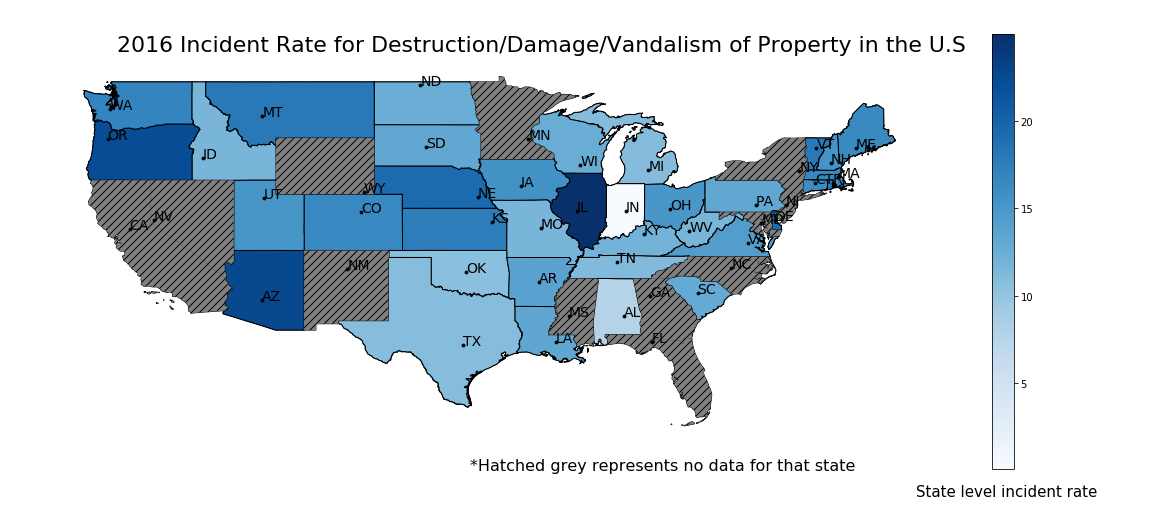

In [184]:
fig,gax = plt.subplots(figsize = (20,8))

state_map_merge_2.plot(ax=gax,edgecolor = 'black',color = 'white')
# Draw the state with vaild data
state_map_merge_2[state_map_merge_2['incident_rate']>=0].plot(ax=gax,edgecolor = 'black', column = 'incident_rate', legend = True, cmap = 'Blues')
state_map_merge_2[~(state_map_merge_2['incident_rate']>=0)].plot(ax=gax, hatch='///', color='grey')
gax.annotate('State level incident rate',xy = (0.78,0.05),xycoords = 'figure fraction',fontsize = 15)


gdf = geopandas.GeoDataFrame(state_map_merge_2, geometry='cap_cord')
gdf.plot(ax=gax, color='black',markersize = 8)
for x, y, label in zip(gdf['cap_cord'].x, gdf['cap_cord'].y, gdf['postal']):
    gax.text(x, y, label, fontsize = 14)

gax.annotate('2016 Incident Rate for Destruction/Damage/Vandalism of Property in the U.S',xy = (0.1,0.9),xycoords = 'figure fraction',fontsize = 22)
gax.annotate('*Hatched grey represents no data for that state',xy = (0.4,0.1),xycoords = 'figure fraction',fontsize = 16)
    
plt.axis('off')

plt.show()

In [186]:
IL_DDV_incident_rate = float(state_map_merge_2.loc[state_map_merge_2['postal']=='IL','incident_rate'].values)
OR_DDV_incident_rate = float( state_map_merge_2.loc[state_map_merge_2['postal']=='OR','incident_rate'].values)
AZ_DDV_incident_rate = float( state_map_merge_2.loc[state_map_merge_2['postal']=='AZ','incident_rate'].values)
print('The Destruction/Damage/Vandalism of Property incident rate in Illinois is {0:.1f}%.'.format(IL_DDV_incident_rate))
print('The Destruction/Damage/Vandalism of Property incident rate in Arizona is {0:.1f}%.'.format(AZ_DDV_incident_rate))
print('The Destruction/Damage/Vandalism of Property incident rate in Oregon is {0:.1f}%.'.format(OR_DDV_incident_rate))

The Destruction/Damage/Vandalism of Property incident rate in Illinois is 25.0%.
The Destruction/Damage/Vandalism of Property incident rate in Arizona is 22.7%.
The Destruction/Damage/Vandalism of Property incident rate in Oregon is 22.3%.


Wow, Destruction/Damage/Vandalism of Property offenses happened really frequently in these three state.

### 3 Which state was more likely to occur Larceny/Theft Offenses?

In [187]:
top_1_category = offense_category[offense_category['offense_category'] == 'Larceny/Theft Offenses']
top_1_category.rename(columns = {'state':'postal','offense_category_count':'top_1_count'},inplace = True)
top_1_category = pd.merge(left = offense_incident, right = top_1_category, on = 'postal', how = 'outer'  )
top_1_category['incident_rate'] = (top_1_category['top_1_count']/top_1_category['total_incident'] )*100
top_1_category.head(3)

,state,postal,total_incident,offense_category,top_1_count,incident_rate
0,Alabama,AL,3057.0,Larceny/Theft Offenses,882.0,28.852
1,Alaska,AK,NaN,NaN,NaN,NaN
2,Arizona,AZ,16847.0,Larceny/Theft Offenses,5756.0,34.166


In [188]:
states_map_3 = geopandas.read_file('cb_2016_us_state_5m/cb_2016_us_state_5m.shp')
states_map_3 = states_map_3.drop(labels = ['STATEFP','STATENS','AFFGEOID','GEOID'],axis = 1)
states_map_3.rename(columns = {'STUSPS':'postal'},inplace = True)
# merge it with crime_rate, and drop the some states
state_map_merge_3 = pd.merge(left = states_map_3, right = top_1_category, on = 'postal', how = 'left')
states_drop = ['Puerto Rico','American Samoa','Commonwealth of the Northern Mariana Islands'
               ,'United States Virgin Islands','Guam','Hawaii','Alaska','District of Columbia']
for state_drop in states_drop:
    state_map_merge_3 = state_map_merge_3[state_map_merge_3['NAME']!=state_drop]
state_map_merge.head()
# Get the capital location pair
capitals = pd.read_csv('capitals.csv')
capitals['cap_cord'] = list(zip(capitals.longitude, capitals.latitude))
capitals['cap_cord'] = capitals['cap_cord'].apply(Point)
capitals = pd.merge(left = state_codes, right = capitals, on = 'state', how = 'right')
state_map_merge_3 = pd.merge(left = state_map_merge_3, right = capitals, on = 'postal', how = 'left')
state_map_merge_3.head()

,postal,NAME,LSAD,ALAND,AWATER,geometry,state_x,total_incident_x,offense_category,top_1_count,incident_rate,state_y,total_incident_y,capital,latitude,longitude,cap_cord
0,AL,Alabama,00,131173688951,4593686489,"(POLYGON ((-88.04374299999999 30.517423, -88.0...",Alabama,3057.0,Larceny/Theft Offenses,882.0,28.852,Alabama,3057.0,Montgomery,32.362,-86.279,POINT (-86.27911800000001 32.361538)
1,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.799683 32.593621, -114.809393 3...",Arizona,16847.0,Larceny/Theft Offenses,5756.0,34.166,Arizona,16847.0,Phoenix,33.448,-112.074,POINT (-112.073844 33.448457)
2,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.060253 38.599328, -109.059541 3...",Colorado,278441.0,Larceny/Theft Offenses,108175.0,38.850,Colorado,278441.0,Denver,39.739,-104.984,POINT (-104.984167 39.7391667)
3,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777499999999 41.100696, -73.69...",Connecticut,97560.0,Larceny/Theft Offenses,35319.0,36.202,Connecticut,97560.0,Hartford,41.767,-72.677,POINT (-72.67699999999999 41.767)
4,FL,Florida,00,138924199212,31386038155,"(POLYGON ((-80.751643 24.857254, -80.729063 24...",Florida,NaN,NaN,NaN,NaN,Florida,NaN,Tallahassee,30.452,-84.273,POINT (-84.27276999999999 30.4518)


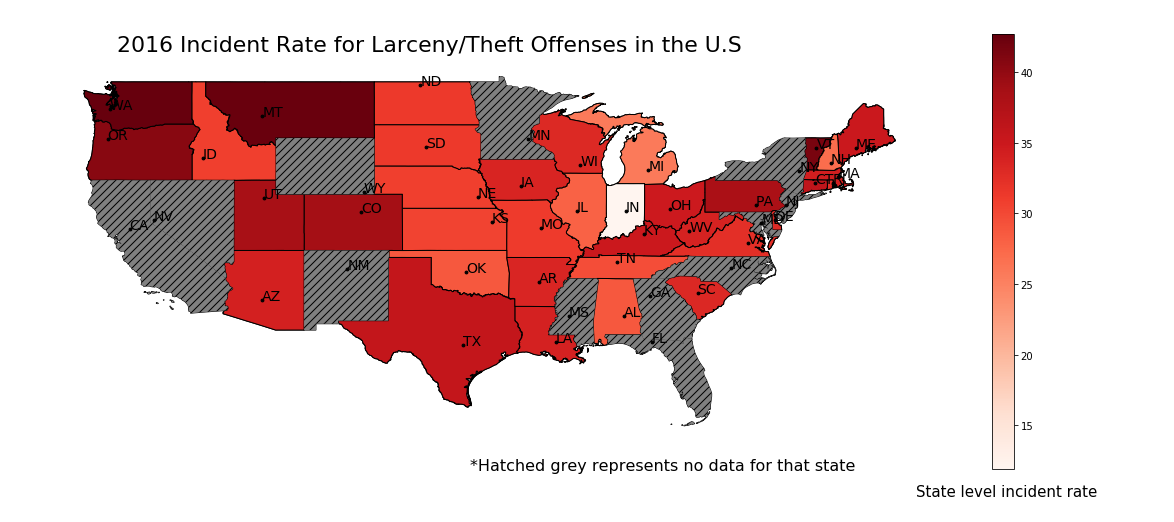

In [195]:
fig,gax = plt.subplots(figsize = (20,8))

state_map_merge_3.plot(ax=gax,edgecolor = 'black',color = 'white')
# Draw the state with vaild data
state_map_merge_3[state_map_merge_3['incident_rate']>=0].plot(ax=gax,edgecolor = 'black', column = 'incident_rate', legend = True, cmap = 'Reds')
state_map_merge_3[~(state_map_merge_3['incident_rate']>=0)].plot(ax=gax, hatch='///', color='grey')
gax.annotate('State level incident rate',xy = (0.78,0.05),xycoords = 'figure fraction',fontsize = 15)

gdf = geopandas.GeoDataFrame(state_map_merge_3, geometry='cap_cord')
gdf.plot(ax=gax, color='black',markersize = 8)
for x, y, label in zip(gdf['cap_cord'].x, gdf['cap_cord'].y, gdf['postal']):
    gax.text(x, y, label, fontsize = 14)

gax.annotate('2016 Incident Rate for Larceny/Theft Offenses in the U.S',xy = (0.1,0.9),xycoords = 'figure fraction',fontsize = 22)
gax.annotate('*Hatched grey represents no data for that state',xy = (0.4,0.1),xycoords = 'figure fraction',fontsize = 16)
    
plt.axis('off')

plt.show()

From the graph, I find **VT, WA, and MT** have the highest Larceny/Theft Offenses incident rates in 2016. How high it is?

In [199]:
VT_LTO_incident_rate = float(state_map_merge_3.loc[state_map_merge_3['postal']=='VT','incident_rate'].values)
WA_LTO_incident_rate = float(state_map_merge_3.loc[state_map_merge_3['postal']=='WA','incident_rate'].values)
MT_LTO_incident_rate = float(state_map_merge_3.loc[state_map_merge_3['postal']=='MT','incident_rate'].values)
IN_LTO_incident_rate = float(state_map_merge_3.loc[state_map_merge_3['postal']=='IN','incident_rate'].values)
print('The Larceny/Theft Offenses incident rate in Washington is {0:.1f}%.'.format(WA_LTO_incident_rate))
print('The Larceny/Theft Offenses incident rate in Montana is {0:.1f}%.'.format(MT_LTO_incident_rate))
print('The Larceny/Theft Offenses incident rate in Vermont is {0:.1f}%.'.format(VT_LTO_incident_rate))
print('The Larceny/Theft Offenses incident rate in Indiana is {0:.1f}%.'.format(IN_LTO_incident_rate))

The Larceny/Theft Offenses incident rate in Washington is 42.7%.
The Larceny/Theft Offenses incident rate in Montana is 42.5%.
The Larceny/Theft Offenses incident rate in Vermont is 41.6%.
The Larceny/Theft Offenses incident rate in Indiana is 11.9%.


### 4 Which state's residents' houses are the most dangerous?

In [201]:
top_1_location = offense_location [offense_location['offense_location'] == 'Residence/Home']
top_1_location.rename(columns = {'state':'postal','offense_location_count':'top_1_count'},inplace = True)
top_1_location = pd.merge(left = offense_incident, right = top_1_location, on = 'postal', how = 'outer'  )
top_1_location['incident_rate'] = (top_1_location['top_1_count']/top_1_location['total_incident'] )*100
top_1_location.head(3)

,state,postal,total_incident,offense_location,top_1_count,incident_rate
0,Alabama,AL,3057.0,Residence/Home,1412.0,46.189
1,Alaska,AK,NaN,NaN,NaN,NaN
2,Arizona,AZ,16847.0,Residence/Home,9207.0,54.651


In [203]:
states_map_4 = geopandas.read_file('cb_2016_us_state_5m/cb_2016_us_state_5m.shp')
states_map_4 = states_map_4.drop(labels = ['STATEFP','STATENS','AFFGEOID','GEOID'],axis = 1)
states_map_4.rename(columns = {'STUSPS':'postal'},inplace = True)
# merge it with crime_rate, and drop the some states
state_map_merge_4 = pd.merge(left = states_map_4, right = top_1_location, on = 'postal', how = 'left')
states_drop = ['Puerto Rico','American Samoa','Commonwealth of the Northern Mariana Islands'
               ,'United States Virgin Islands','Guam','Hawaii','Alaska','District of Columbia']
for state_drop in states_drop:
    state_map_merge_4 = state_map_merge_4[state_map_merge_4['NAME']!=state_drop]

# Get the capital location pair
capitals = pd.read_csv('capitals.csv')
capitals['cap_cord'] = list(zip(capitals.longitude, capitals.latitude))
capitals['cap_cord'] = capitals['cap_cord'].apply(Point)
capitals = pd.merge(left = state_codes, right = capitals, on = 'state', how = 'right')
state_map_merge_4 = pd.merge(left = state_map_merge_4, right = capitals, on = 'postal', how = 'left')
state_map_merge_4.head()

,postal,NAME,LSAD,ALAND,AWATER,geometry,state_x,total_incident_x,offense_location,top_1_count,incident_rate,state_y,total_incident_y,capital,latitude,longitude,cap_cord
0,AL,Alabama,00,131173688951,4593686489,"(POLYGON ((-88.04374299999999 30.517423, -88.0...",Alabama,3057.0,Residence/Home,1412.0,46.189,Alabama,3057.0,Montgomery,32.362,-86.279,POINT (-86.27911800000001 32.361538)
1,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.799683 32.593621, -114.809393 3...",Arizona,16847.0,Residence/Home,9207.0,54.651,Arizona,16847.0,Phoenix,33.448,-112.074,POINT (-112.073844 33.448457)
2,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.060253 38.599328, -109.059541 3...",Colorado,278441.0,Residence/Home,114695.0,41.192,Colorado,278441.0,Denver,39.739,-104.984,POINT (-104.984167 39.7391667)
3,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777499999999 41.100696, -73.69...",Connecticut,97560.0,Residence/Home,44725.0,45.844,Connecticut,97560.0,Hartford,41.767,-72.677,POINT (-72.67699999999999 41.767)
4,FL,Florida,00,138924199212,31386038155,"(POLYGON ((-80.751643 24.857254, -80.729063 24...",Florida,NaN,NaN,NaN,NaN,Florida,NaN,Tallahassee,30.452,-84.273,POINT (-84.27276999999999 30.4518)


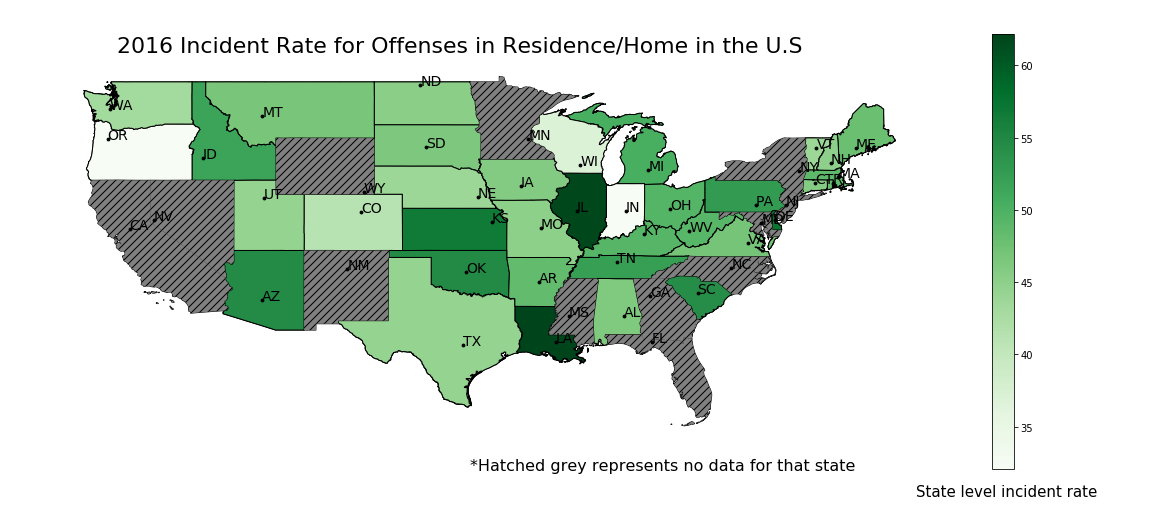

In [206]:
fig,gax = plt.subplots(figsize = (20,8))

state_map_merge_4.plot(ax=gax,edgecolor = 'black',color = 'white')
# Draw the state with vaild data
state_map_merge_4[state_map_merge_4['incident_rate']>=0].plot(ax=gax,edgecolor = 'black', column = 'incident_rate', legend = True, cmap = 'Greens')
state_map_merge_4[~(state_map_merge_4['incident_rate']>=0)].plot(ax=gax, hatch='///', color='grey')
gax.annotate('State level incident rate',xy = (0.78,0.05),xycoords = 'figure fraction',fontsize = 15)

gdf = geopandas.GeoDataFrame(state_map_merge_4, geometry='cap_cord')
gdf.plot(ax=gax, color='black',markersize = 8)
for x, y, label in zip(gdf['cap_cord'].x, gdf['cap_cord'].y, gdf['postal']):
    gax.text(x, y, label, fontsize = 14)

gax.annotate('2016 Incident Rate for Offenses in Residence/Home in the U.S',xy = (0.1,0.9),xycoords = 'figure fraction',fontsize = 22)
gax.annotate('*Hatched grey represents no data for that state',xy = (0.4,0.1),xycoords = 'figure fraction',fontsize = 16)
    
plt.axis('off')

plt.show()

From the graph, I find the residents' house in **IA, IL, and SC** have the highest risk of being Offended in 2016. How high it is?

In [209]:
LA_RH_incident_rate = float(state_map_merge_4.loc[state_map_merge_4['postal']=='LA','incident_rate'].values)
IL_RH_incident_rate = float(state_map_merge_4.loc[state_map_merge_4['postal']=='IL','incident_rate'].values)
KS_RH_incident_rate = float(state_map_merge_4.loc[state_map_merge_4['postal']=='KS','incident_rate'].values)
IN_RH_incident_rate = float(state_map_merge_4.loc[state_map_merge_4['postal']=='IN','incident_rate'].values)
print('In 2016 Incident Rate for Offenses in Residence/Home in Louisiana is {0:.1f}%.'.format(LA_RH_incident_rate))
print('In 2016 Incident Rate for Offenses in Residence/Home in Illinois is {0:.1f}%.'.format(IL_RH_incident_rate))
print('In 2016 Incident Rate for Offenses in Residence/Home in Kansas is {0:.1f}%.'.format(KS_RH_incident_rate))
print('In 2016 Incident Rate for Offenses in Residence/Home in Indiana is {0:.1f}%.'.format(IN_RH_incident_rate))

In 2016 Incident Rate for Offenses in Residence/Home in Louisiana is 62.2%.
In 2016 Incident Rate for Offenses in Residence/Home in Illinois is 61.9%.
In 2016 Incident Rate for Offenses in Residence/Home in Kansas is 56.7%.
In 2016 Incident Rate for Offenses in Residence/Home in Indiana is 32.1%.


## Part 2 Correlation

One of the main ideas of the crime pattern theory is the non-randomness. Certain type of criminal activity is more likely to occur in certain type of area.

### 1: correlation between crime activity and type of location 
In the previous part, I have already find the top 10 offense location, offense category and offense type. Now, I would like to find the correlation between offense category and offesne location. (Why I am skipping the offense type is that category is a more generalized concept compared to the offense type).

First of all, let me create a country level merged dataframe with all the offense related data into it. By achineve this ```agg_offense``` DataFrame, a for-loop might be useful.

In [210]:
agg_offense = pd.DataFrame()

In [213]:
for state in state_list:
    path_name = state + '-2016/NIBRS_OFFENSE.csv'
    my_file = Path(path_name)
    if my_file.is_file():
        file_name =  state + '_OFFENSE'
        file_name = pd.read_csv(path_name)
        #drop useless varable
        file_name = file_name.drop(labels = ['num_premises_entered','ff_line_number'],axis = 1)
        #merge with offense type
        merge_file_name = state +'_OFFENSE_MERGE'
        merge_file_name = pd.merge(left = file_name, right = OFFENSE_TYPE, on = 'offense_type_id', how = 'left')
        #merge with location type
        merge_file_name = pd.merge(left = merge_file_name, right = LOCATION_TYPE, on = 'location_id', how = 'left')
        #add the state indicator for each incident
        merge_file_name['postal'] = state
        #append the state offense DataFrame to the agg_offense
        agg_offense = agg_offense.append(merge_file_name)
agg_offense.head()

,offense_id,incident_id,offense_type_id,attempt_complete_flag,location_id,method_entry_code,offense_code,offense_name,crime_against,offense_category_name,location_code,location_name,postal
0,92050828,84264834,11,C,20,NaN,250,Counterfeiting/Forgery,Property,Counterfeiting/Forgery,20,Residence/Home,AL
1,92509677,84663100,41,C,20,NaN,26B,Credit Card/Automated Teller Machine Fraud,Property,Fraud Offenses,20,Residence/Home,AL
2,92509676,84663100,46,C,20,NaN,26C,Impersonation,Property,Fraud Offenses,20,Residence/Home,AL
3,92509673,84663599,51,C,20,NaN,13B,Simple Assault,Person,Assault Offenses,20,Residence/Home,AL
4,92050826,84264831,51,C,20,NaN,13B,Simple Assault,Person,Assault Offenses,20,Residence/Home,AL


In [216]:
print(agg_offense.shape)

(14895328, 13)


We can find this is a really huge data set, with about **14,895,328** lines of incidents. 

As I mentioned in the descriptive part, there are 24 different offense categories, 47 different offense locations. I can definitely draw a heat map to show all the correlation between these variables. However, it may not be that informative by showing a box with 24 x variables, and 47 y variables. What I am more interested in is the relationship between the top-rank offense categories and locations.

Therefore, I am going to show the heat map for the top 10 locations and top 10 offenses categories.

In [217]:
top10_location_list = top10_location.index.tolist()
top10_category_list = top10_category.index.tolist()
agg_loc_cat_offense = pd.DataFrame()

location_name = list(location_name)
offense_category_name = list(offense_category_name)

#get the list of location that other than the top_10 location, we will remove those later on 
location_to_remove = []
for location in location_name:
    if location in top10_location_list:
        continue
    else:
        location_to_remove.append(location)
print('These are the location need to be removed: '+ str(location_to_remove) +'\n')
#get the list of category that other than the top_10 category, we will remove those later on 
category_to_remove = []
for category in offense_category_name:
    if category in top10_category_list:
        continue
    else:
        category_to_remove.append(category)
print('These are the categories need to be removed: '+ str(category_to_remove))

These are the location need to be removed: ['Air/Bus/Train Terminal', 'Bank/Savings and Loan', 'Bar/Nightclub', 'Church Synagogue/Temple', 'Construction Site', 'Field/Woods', 'Government/Public Building', 'Hotel/Motel/Etc.', 'Jail/Prison', 'Lake/Waterway', 'Liquor Store', 'Rental Stor. Facil.', 'School/College', 'Service/Gas Station', 'Abandoned/Condemned Structure', 'Amusement Park', 'Arena/Stadium/Fairgrounds/Coliseum', 'ATM Separate from Bank', 'Auto Dealership New/Used', 'Camp/Campground', 'Daycare Facility', 'Dock/Wharf/Freight/Modal Terminal', 'Farm Facility', 'Gambling Facility/Casino/Race Track', 'Industrial Site', 'Military Installation', 'Park/Playground', 'Rest Area', 'School-College/University', 'School-Elementary/Secondary', 'Shelter-Mission/Homeless', 'Shopping Mall', 'Tribal Lands', 'Community Center', 'Drug Store/Dr. s Office/Hospital', 'Not Specified', 'Cyberspace']

These are the categories need to be removed: ['Homicide Offenses', nan, 'Pornography/Obscene Material',

In [218]:
agg_loc_cat_offense = agg_offense #create a new data frame to run the correaltion test, incase I mess it up
# Keep the incident happened in one of the top location using for loop
for location in location_to_remove:
    agg_loc_cat_offense = agg_loc_cat_offense[agg_loc_cat_offense['location_name']!=location]

# remove the incident that can be categorized into one of the top 10 categories from agg_loc_cat_offense
for category in category_to_remove:
    agg_loc_cat_offense = agg_loc_cat_offense[agg_loc_cat_offense['offense_category_name']!=category]
print(agg_loc_cat_offense.shape)

(12485732, 13)


We can see a huge decrease in the size of the number of cases if we confined the conditions to top 10 category and top 10 location. Now we find the size of the data frame is consist of **12,485,732** incidents.

With the cleaned the new DataFrame ```agg_loc_cat_offense```, I am able to use the heatmap from seaborn package to conclude the relationship between location and offense category. 

Text(0.5, 1.0, 'The relationship between Top 10 Offense location and category')

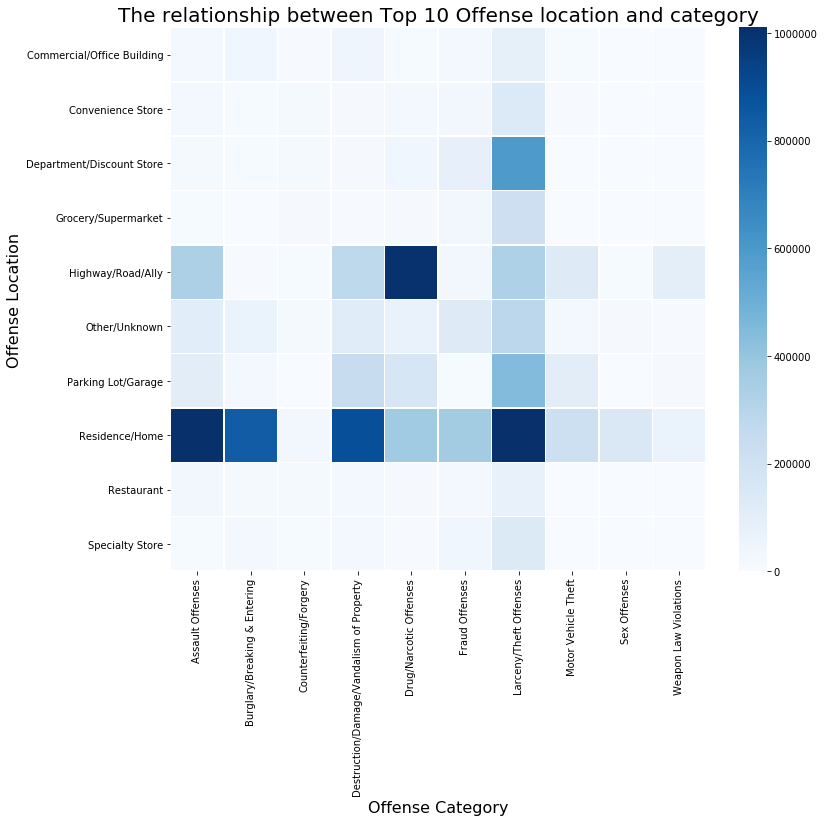

In [220]:
fig,ax = plt.subplots(figsize = (12,10))
agg_loc_cat_offense_graph = agg_loc_cat_offense.groupby(['location_name','offense_category_name']).count()
agg_loc_cat_offense_graph = agg_loc_cat_offense_graph.reset_index()

agg_loc_cat_offense_graph = agg_loc_cat_offense_graph.pivot('location_name','offense_category_name','incident_id')
#Draw the heatmap
ax = sea.heatmap(agg_loc_cat_offense_graph,robust = True,linewidths=.5,cmap="Blues")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Offense Category',fontsize = 16)
ax.set_ylabel('Offense Location',fontsize = 16)
ax.set_title('The relationship between Top 10 Offense location and category',fontsize = 20)

Interestingly, I observed strong correlation for certain type of offenses: **Larceny/Theft Offenses**. It seems like  thieves's "favorite" locations are Residence/Home, Department/Discount Store and parking lot/garage. The result make sense to me since these are locations where people usually place their valuable assets. 

Another strong correlation pattern I have observed from this graph is for **Drug/Narcotic Offenses**. Most likely, the drug offenses happened in some open spaces like highway/road/ally. The second rank is the residence/home. 

From the analysis in the part one, we know that residence/home is the most dangerous location. And this graph does show a wide range of offenses are more likely to happen in a home setting, such as Larceny/Theft Offenses, Assualt offenses, Destruction/Damage/Vandalism of Property, and Burglary/Breaking & Entering.

### 1: correlation between larceny/theft offenses and type of location 

As I mentioned above, **Larceny/Theft Offenses** was the most frequent offense category, and it contains several different types of Larceny/Theft Offenses.

In [221]:
Larceny_Theft_Offenses = OFFENSE_TYPE.loc[OFFENSE_TYPE['offense_category_name']=='Larceny/Theft Offenses','offense_name']
Larceny_Theft_Offenses = list(Larceny_Theft_Offenses)
print('There are ' + str(len(Larceny_Theft_Offenses)) +' different types of Larceny/Theft offenses.\n' )
print('These types are: ' + str(Larceny_Theft_Offenses) +'.')

There are 9 different types of Larceny/Theft offenses.

These types are: ['Not Specified', 'Theft of Motor Vehicle Parts or Accessories', 'Pocket-picking', 'Theft From Motor Vehicle', 'Purse-snatching', 'Shoplifting', 'All Other Larceny', 'Theft From Building', 'Theft From Coin-Operated Machine or Device'].


I am interested in where these 9 types of offenses are more likely to occur. In the previous heatmap, I found that Resident/Home is the dangerous place for people worrying about the theft. How about those other type of theft, Such as the theft from coin-operated machine or devices?

It is needless to say that theft from coin-operated machine or devices may only happen in the public area since only few home will install vending machines. However, I am curious about which public area is more in danger of the this type of theft. I am also curious to see any interesting results showing up from the heatmap.

To do so, firstly, I have to clean up the dataset a little bit and let it contain only Larceny/Theft Offenses. Then use the same idea to depict the heatmap.

Text(0.5, 1.0, 'The relationship between Top 10 Offense location and Larceny/Theft offenses')

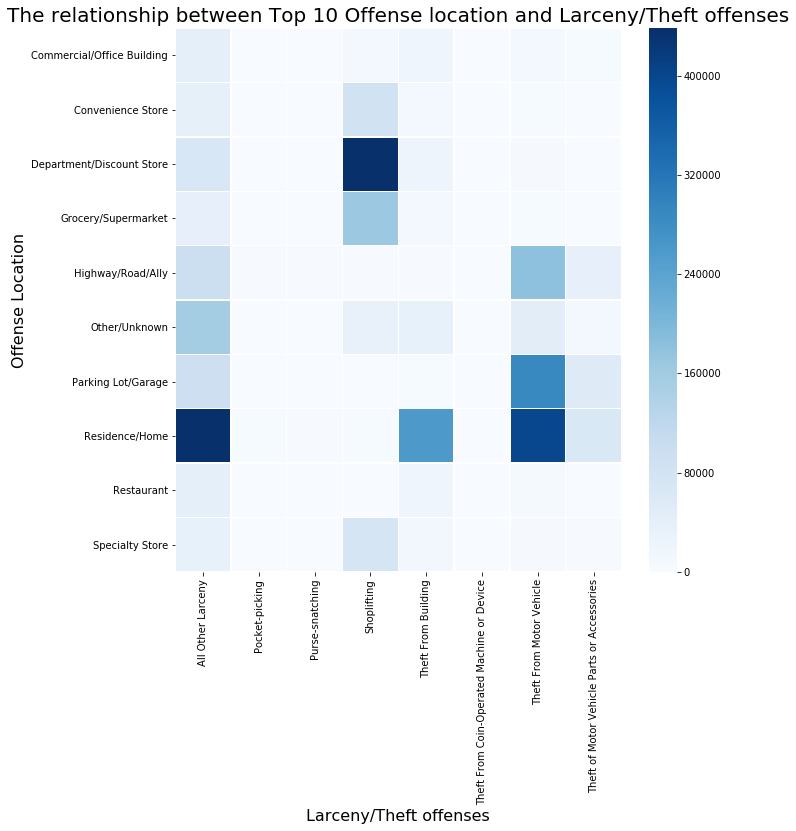

In [222]:
# Get the incident only within the category of Larceny/Theft Offenses
agg_loc_cat_theft_graph = agg_loc_cat_offense[agg_loc_cat_offense['offense_category_name']== 'Larceny/Theft Offenses']
agg_loc_cat_theft_graph = agg_loc_cat_theft_graph.groupby(['location_name','offense_name']).count()
agg_loc_cat_theft_graph = agg_loc_cat_theft_graph.reset_index()

agg_loc_cat_theft_graph = agg_loc_cat_theft_graph.pivot('location_name','offense_name','incident_id')
#Draw the heatmap
fig,ax = plt.subplots(figsize = (10,10))
ax = sea.heatmap(agg_loc_cat_theft_graph,robust = True,linewidths=.5,cmap="Blues")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Larceny/Theft offenses',fontsize = 16)
ax.set_ylabel('Offense Location',fontsize = 16)
ax.set_title('The relationship between Top 10 Offense location and Larceny/Theft offenses',fontsize = 20)

In this heatmap, I find shoplifting is more likely to occur in department store, grocery store, specialty store and convenience store. Basically, shoplifting has to happen in the commercial space. Something surprise is that theft from motor vehicle is more likely to occur in the residence compared to the parking lot. 

## Part 3: Trend

In this part, I would like to show the trend of the crime rate in the state of Wisconsin specifically. As an undergrad who has lived in Wisconsin since 2016, I am interested in discovering whether the state become safer or more dangerous. 

As mentioned the above, the crime rate was calculated based on each year state population level. The data was estimated by US census based on the 2010 census survey. 

The new data frame ```WI_incident_trend``` was created to store each year total incident number (count the number of each unique incident), estimated population in that year and crime rate.

First of all, create the data frame ```WI_incident_trend``` and store ```date``` and ```total_incident``` variables correspondingly.

In [223]:
WI_incident_trend = pd.DataFrame()
date = []
total_incident = []

for year in range(2010,2017):
    date.append(year)
    path_name = 'WI-' + str(year) +'/NIBRS_OFFENSE.csv'
    my_file = Path(path_name)
    if my_file.is_file():
        file_name =  state + '_OFFENSE'
        file_name = pd.read_csv(path_name)
        #drop useless varable
        file_name = file_name.drop(labels = ['num_premises_entered','ff_line_number'],axis = 1)
    
        #count offense incident number 
        incident_count_list = file_name['incident_id'].value_counts()
        total_incident.append(len(incident_count_list))
        # create a state level data frame to contain total number of incident of each state, state code

WI_incident_trend['date'] = date
WI_incident_trend['total_incident'] = total_incident
WI_incident_trend

,date,total_incident
0,2010,121919
1,2011,117731
2,2012,121103
3,2013,113628
4,2014,111763
5,2015,124006
6,2016,131909


Then, load the population data file again, and get each year population estimation into column ```population```.

Now I can calculate the crime rate and store it into ```crime_rate```.

In [224]:
pop = pd.read_csv('nst-est2017-alldata.csv')
pop.rename(columns = {'NAME':'state'},inplace = True)
population = []

for year in range(2010,2017):
    col_to_get = 'POPESTIMATE' + str(year)
    pop_year = pop.loc[pop['state']== 'Wisconsin', col_to_get]
    population.append(int(pop_year))
    
WI_incident_trend['population'] = population
WI_incident_trend['crime_rate'] = (WI_incident_trend['total_incident']/WI_incident_trend['population'])*100
WI_incident_trend

,date,total_incident,population,crime_rate
0,2010,121919,5690403,2.143
1,2011,117731,5705812,2.063
2,2012,121103,5721075,2.117
3,2013,113628,5736673,1.981
4,2014,111763,5751272,1.943
5,2015,124006,5759744,2.153
6,2016,131909,5772917,2.285


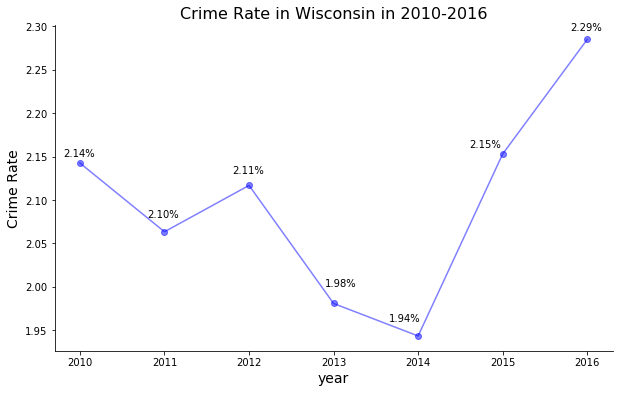

In [226]:
fig, ax = plt.subplots(figsize = (10,6)) 
ax.plot(WI_incident_trend['date'], WI_incident_trend['crime_rate'], marker = 'o',     
        color='blue',alpha = 0.5)  

ax.set_ylabel('Crime Rate',fontsize = 14)  
ax.set_xlabel('year',fontsize = 14)                 
ax.set_title('Crime Rate in Wisconsin in 2010-2016',fontsize = 16)

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top
ax.text(2009.8,2.15,'2.14%')
ax.text(2010.8,2.08,'2.10%')
ax.text(2011.8,2.13,'2.11%')
ax.text(2012.9,2.0,'1.98%')
ax.text(2013.65,1.96,'1.94%')
ax.text(2014.6,2.16,'2.15%')
ax.text(2015.8,2.295,'2.29%')

plt.show()

From the trend plot, I find the lowest crime rate is 1.94% in 2014. The highest is 2.3% in 2016, just in the year I moved to Wisconsin. Thinking about the highest crime rate in South Carolina is 7.0% in 2016, I feel like that the crime rate in Wisconsin is still fairly low compared to the other states.

# Conclusions and directions for future research

In the analysis part, I list some key findings about both the state and national level crime pattern. Some takeaways I have are the importance of having a good locker for my house and keeping valuable assets in the bank. Due to limited data availability of the NIBRS data, the national level analysis is not the real national comparison. Because of the absence of some states that have relatively large size of population, some results can be changed completely after adding those in.

I only focus on a small portion of the whole NIBRS data, due to the time and length restriction of the class project. The offense related data, such as offender, the relationship between offender and victim, can also be used to answer demographic related research question. I am interested in the knowing who are the offenders. Age and Ethnicity are some aspects that future research could focus on. Finding the relationship between offenders’ demographic features and the type of offenses can lead to the deep level crime pattern analysis. This research project is just a taste of the NIBRS data. It’s just a beginning. A lot of interesting research can implement this data set to find answers. 

